## import data

In [84]:
# "","T_Blackbody Ave. (C)","T_InsideLeft Ave. (C)","T_InsideRight Ave. (C)","T_Outside Ave. (C)"

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv("SBölzmannK.csv")
# data.info()

# read data in Kelvin
time = data.time
temp_boltzmann = data.T_Blackbody + 273.15
temp_inside_left = data.T_InsideLeft + 273.15
temp_inside_right = data.T_InsideRight + 273.15
temp_outside = data.T_Outside + 273.15

# get from "HH:MM:SS" to minutes
def time_to_minutes(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h*60 + m + s/60

time_in_minutes = [time_to_minutes(time) for time in time]
time = pd.Series(time_in_minutes)

## calculation of Stefan-Boltzmann constant by every measurement point

In [85]:
# calculate last 15 datapoints (temp blackbody) 
import numpy as np

selection = [[382,397], [733,748], [1046,1061], [1375,1390], [1660,1675], [2067,2082], [2382,2397]]

T4_T4 = []
temperature_averages = []
temperature_umgebung_aussen = []
temperature_umgebung_innen = []

stat_temperature_averages = []
stat_temperature_umgebung_aussen = []
stat_temperature_umgebung_innen = []
# print(temp_boltzmann)

for i,e in enumerate(selection):
    selected_rows_boltzmann = temp_boltzmann.iloc[e[0]:e[1]]
    selected_rows_inside_left = temp_inside_left.iloc[e[0]:e[1]]
    selected_rows_inside_right = temp_inside_right.iloc[e[0]:e[1]]
    selected_rows_outside = temp_outside.iloc[e[0]:e[1]]
    
    stat_temperature_averages.append(np.std(selected_rows_boltzmann) / np.sqrt(e[1] - e[0]))
    stat_temperature_umgebung_aussen.append(np.std(selected_rows_outside) / np.sqrt(e[1] - e[0]))
    stat_temperature_umgebung_innen.append(np.std((selected_rows_inside_left+selected_rows_inside_right)/2) / np.sqrt(e[1] - e[0]))
    
    temperature_averages.append(np.average(selected_rows_boltzmann))
    temperature_umgebung_aussen.append(np.average(selected_rows_outside)) 
    temperature_umgebung_innen.append((np.average(selected_rows_inside_left) + np.average(selected_rows_inside_right)) / 2)
    T4_T4.append(np.average(selected_rows_boltzmann)**4-((np.average((selected_rows_inside_left)+np.average(selected_rows_inside_right))/2)**4))

print("temperature_averages\t\t",temperature_averages)
print("temperature_umgebung_aussen\t", temperature_umgebung_aussen)
print("temperature_umgebung_innen\t", temperature_umgebung_innen)
print("T4_T4\t\t\t\t", T4_T4, "\n")
print("stat heizer\t", stat_temperature_averages)
print("stat umgebu out\t", stat_temperature_umgebung_aussen)
print("stat umgebu in\t", stat_temperature_umgebung_innen)

temperature_averages		 [423.6806666666666, 475.6899999999998, 523.9586666666668, 568.044, 609.2846666666666, 646.2406666666666, 685.0960000000001]
temperature_umgebung_aussen	 [299.90599999999995, 301.50466666666665, 303.20933333333323, 305.19, 307.13399999999996, 309.75000000000006, 312.28333333333336]
temperature_umgebung_innen	 [300.875, 302.957, 305.2639999999999, 307.94333333333327, 310.6966666666666, 314.12166666666667, 317.6186666666666]
T4_T4				 [24027241109.42794, 42778971363.18001, 66684543749.9295, 95125943648.39035, 128491575375.40459, 164676063747.07114, 210118450785.40115] 

stat heizer	 [0.005614795270170818, 0.0013333333333359102, 0.002079886036762124, 0.0018378731669436911, 0.0012881223774378894, 0.0017554149029434256, 0.001577621275491796]
stat umgebu out	 [0.004299870799088649, 0.0031079348865868986, 0.003940295157205572, 0.004000000000001415, 0.0035023801430839295, 0.0036514837167019375, 0.00407340061773482]
stat umgebu in	 [0.0048989794855634474, 0.002485513584313

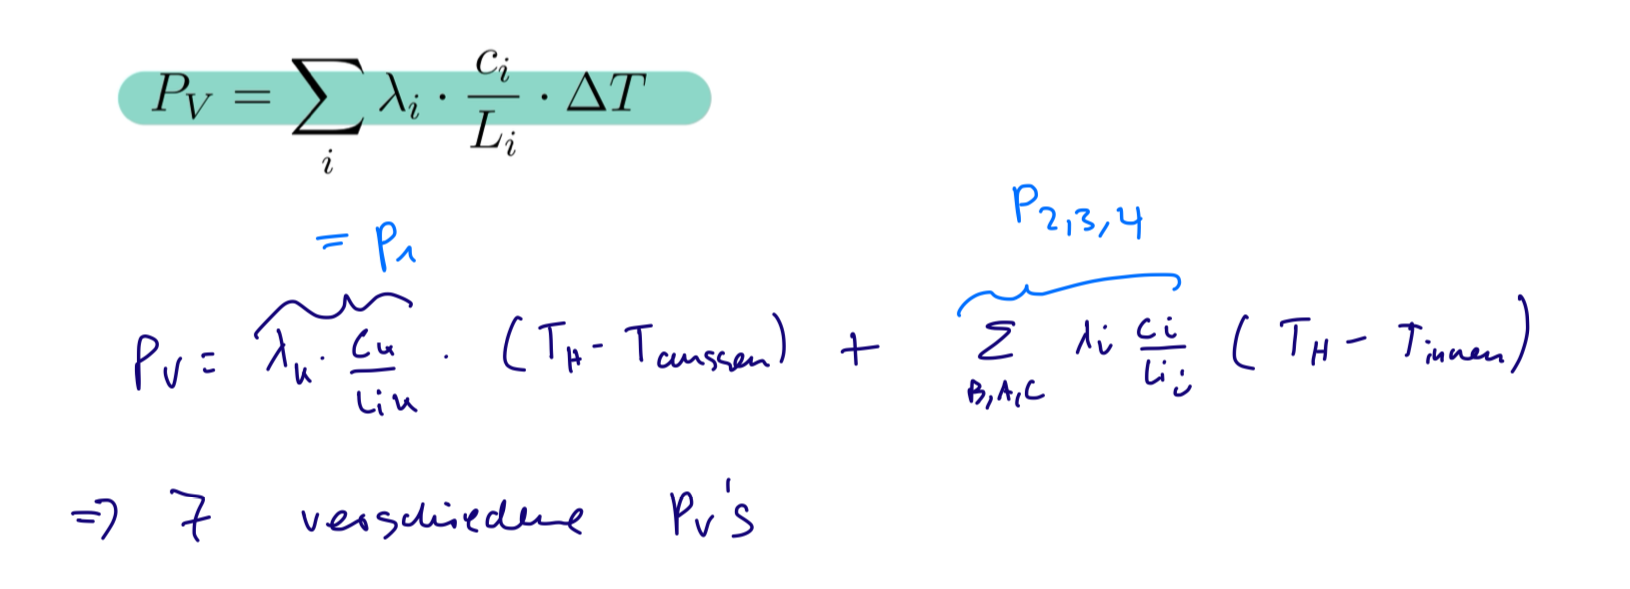

In [67]:
# calculation of Stefan-Boltzmann constant by every measurement point

# # P_V
# # lambda = leitfaehigkeit
# # c = durchmesser / fläche
# # L = laenge

material = np.array([6.,2.,1.,1.])
leitfaehigkeit = np.array([390, 69.9, 29.7, 19.2])
durchmesser = (np.array([0.00028, 0.00026, 0.0002, 0.0002])/2)**2 * np.pi # umgerechnet in Querschnittsfläche
laenge = np.array([0.016,0.020,0.030,0.030])

U = np.array([3,4,5,6,7,8,9]) # eingestellte Spannungen und Stromstärken
I = np.array([0.96,1.279,1.592,1.898,2.208,2.504,2.789]) # eingestellte Spannungen und Stromstärken
A = 1899.4 * (1/(10**6)) # Fläche Schwarzkörper
epsilon = 1 # idealer Schwarzkörper
# P_V = 0
numpy_T4_T4 = np.array(T4_T4)

pv_correct = []
for i in range(7):
    pv_first_part = (material[0]*leitfaehigkeit[0]*durchmesser[0]/laenge[0])*(temperature_averages[i]-temperature_umgebung_aussen[i])
    pv_second_part = (material[1:4]*leitfaehigkeit[1:4]*durchmesser[1:4]/laenge[1:4])*(temperature_averages[i]-temperature_umgebung_innen[i])
    pv_correct.append(pv_first_part + np.sum(pv_second_part))
    
PV = np.array(pv_correct)

def stefan_boltzmann_constant(U,I, P_V,A,epsilon, T4_T4):
    return (U*I - P_V) / (A*epsilon*T4_T4)


stefan_boltzmann_constant(U,I,PV,A,epsilon, numpy_T4_T4)

# calculating 
print("individual sigma values:", stefan_boltzmann_constant(U,I,PV,A,epsilon,numpy_T4_T4))
print("average sigma:          ", np.average(stefan_boltzmann_constant(U,I,PV,A,epsilon,numpy_T4_T4)))
print("error sigma:            ", np.std(stefan_boltzmann_constant(U,I,PV,A,epsilon,numpy_T4_T4)))

individual sigma values: [3.75459744e-08 4.27601058e-08 4.64209675e-08 4.93189288e-08
 5.16638457e-08 5.39075522e-08 5.40930622e-08]
average sigma:           4.79586338035751e-08
error sigma:             5.687234152602199e-09


## calculation of Stefan-Boltzmann constant by fitting a curve

Fitted linear function parameters: slope = 5.69e-08, intercept = -607.0
error of sigma: 6.608002503944575e-10


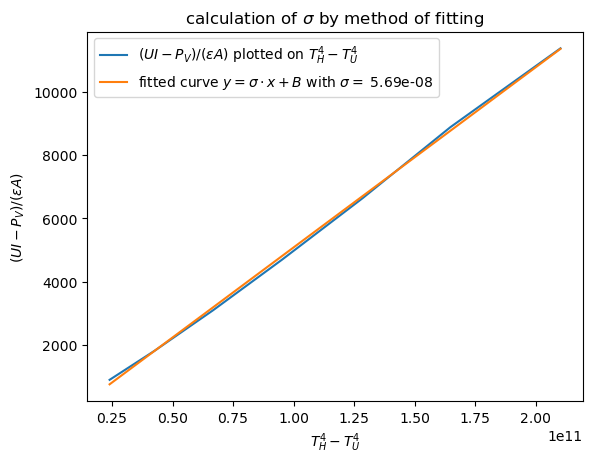

In [86]:
from math import log10, floor
from scipy.optimize import curve_fit

def y_achse(U,I,PV,A,epsilon):
    return (U*I - PV) / (epsilon*A)

x_achse = (np.array(T4_T4))
y_achse = y_achse(U,I,PV,A,epsilon)

def linear_fit(a,x, b):
    return a*x + b

# Perform the curve fitting
popt, pcov = curve_fit(linear_fit, x_achse, y_achse)

# The optimal parameters (slope and intercept) would be in 'popt':
slope = popt[0]
intercept = popt[1]

rounded_slope = round(slope, 3 - int(floor(log10(abs(slope)))) - 1)
rounded_intercept = round(intercept, 3 - int(floor(log10(abs(intercept)))) - 1)

print(f"Fitted linear function parameters: slope = {rounded_slope}, intercept = {rounded_intercept}")


# Berechnung des Standardfehlers der Steigung (Fehler von \sigma).
# p_cov alleine wäre varianz -> deswegen sqrt()
sigma_error = np.sqrt((pcov[0, 0])) 

print(f"error of sigma: {sigma_error}")

plt.plot(x_achse, y_achse, label=r"$(UI - P_V) / (\epsilon A)$ plotted on $T^4_{H} - T^4_{U}$")
plt.plot(x_achse, linear_fit(slope, x_achse, intercept), label=r'fitted curve $y = \sigma \cdot x + B$ with $\sigma =$ %s' % (rounded_slope))
plt.title(r'calculation of $\sigma$ by method of fitting')
plt.xlabel(r"$T^4_{H} - T^4_{U}$")
plt.ylabel(r"$(UI - P_V) / (\epsilon A)$")
plt.legend()
plt.savefig("linear_bolzz.pdf")
plt.show()


## Calculation of Emissivity ε of Blackbody

In [73]:
def emissivity(U,I,PV,A,sigma,T4_T4):
    return (U*I - PV) / (A*sigma*T4_T4)


sigma_literaturwert = 5.670367*10**(-8)
emissivity(U, I, PV, A, sigma_literaturwert, np.array(T4_T4))

print("average of epsilon:", np.average(emissivity(U, I, PV, A, sigma_literaturwert, np.array(T4_T4))))
print("error of epsilon:  ", np.std(emissivity(U, I, PV, A, sigma_literaturwert, np.array(T4_T4))))

average of epsilon: 0.8457765397473409
error of epsilon:   0.1002974613918675


## Plots

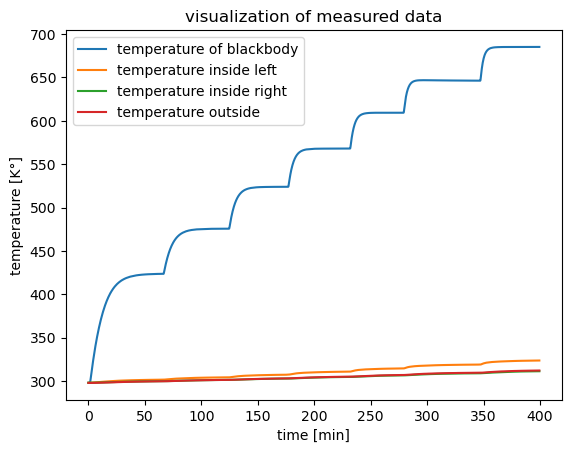

In [ ]:
# 1.er plot
plt.plot(time, temp_boltzmann, label="temperature of blackbody")

plt.plot(time, temp_inside_left, label="temperature inside left")
plt.plot(time, temp_inside_right, label="temperature inside right")
plt.plot(time, temp_outside, label="temperature outside")

plt.title('visualization of measured data')
plt.xlabel("time [min]")
plt.ylabel("temperature [K°]")
plt.legend()
plt.show()

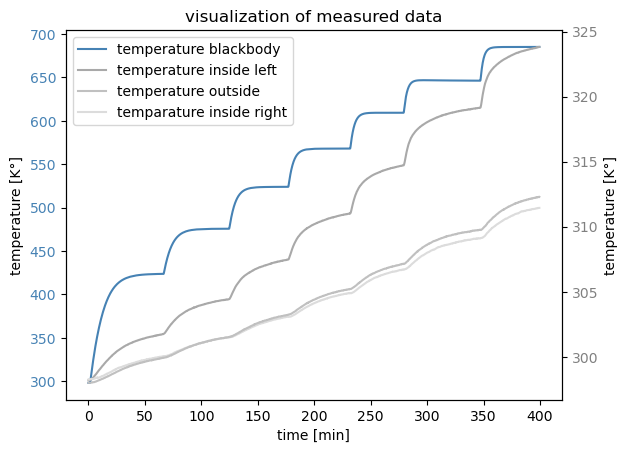

In [ ]:
# improved plot
import numpy as np 
import matplotlib.pyplot as plt 
  
  
# Create Plot
fig, ax1 = plt.subplots() 
  
ax1.set_xlabel('time [min]') 
ax1.set_ylabel('temperature [K°]') 
# ax1.plot(time, temp_boltzmann, color = 'red', label="temperature blackbody") 

plot_1 = ax1.plot(time, temp_boltzmann, color = 'steelblue', label="temperature blackbody")   

ax1.tick_params(axis ='y', labelcolor = 'steelblue') 
#ax1.legend()

# Adding Twin Axes

ax2 = ax1.twinx() 

ax2.set_ylabel('temperature [K°]') 

# ax2.plot(time, temp_inside_left, color = 'slateblue', label="temperature inside left") 
# ax2.plot(time, temp_inside_right, color = 'cornflowerblue', label="temparature inside right") 
# ax2.plot(time, temp_outside, color = 'royalblue', label="temperature outside") 

plot_2 = ax2.plot(time, temp_inside_left, color = 'darkgrey', label="temperature inside left") 
plot_3 = ax2.plot(time, temp_inside_right, color = 'gainsboro', label="temparature inside right") 
plot_4 = ax2.plot(time, temp_outside, color = 'silver', label="temperature outside") 

ax2.tick_params(axis ='y', labelcolor = 'gray') 

# legend
plt.title("visualization of measured data")
lns = plot_1 + plot_2 + plot_4 + plot_3
labels = [l.get_label() for l in lns]
plt.legend(lns, labels, loc=0)

plt.savefig("data_visualization.pdf")

plt.show()